## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [3]:
df = pd.read_csv("C:\\Users\\user\\desktop\\projects\\Employee_Churn_prediction\\data\\HR_comma_sep.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Descriptive Stats about the data

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Renaming the columns

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
# Converting to lowercase

df.columns=df.columns.str.lower()

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
# Renaming 

df = df.rename(columns={'average_montly_hours':'average_monthly_hours',
                   'time_spend_company':'tenure'})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# Checking for missingness

In [14]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

# Checking for duplicates

In [17]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


- It seems quite unlikely that the same employees will have the same values across multiple columns.
- We'll proceed with dropping them.

In [6]:
df1 = df.drop_duplicates(keep='first')

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape, df1.shape

((14999, 10), (11991, 10))

# Check Outliers

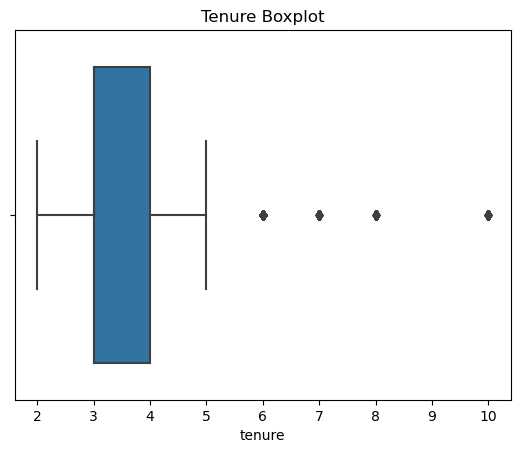

In [21]:
sns.boxplot(x='tenure',data=df1)
plt.title('Tenure Boxplot')
plt.show()

In [8]:
# Calculating the number of rows with outliers in the dataset

percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)

iqr = percentile_75 - percentile_25

upper = (percentile_75 + 1.5) * iqr
lower = (percentile_25 - 1.5) * iqr

outliers = df1[(df1['tenure'] < lower) | (df1['tenure'] > upper)]
print(f'Rows with Outliers: {len(outliers)}')

Rows with Outliers: 824


## Data Exploration

In [23]:
# Get numbers of people who left vs. stayed
print('Employee Count')
print(df1['left'].value_counts())
print('\n')
print('Employee percentage')
print(df1['left'].value_counts(normalize=True)*100)

Employee Count
left
0    10000
1     1991
Name: count, dtype: int64


Employee percentage
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


# Data Visualization

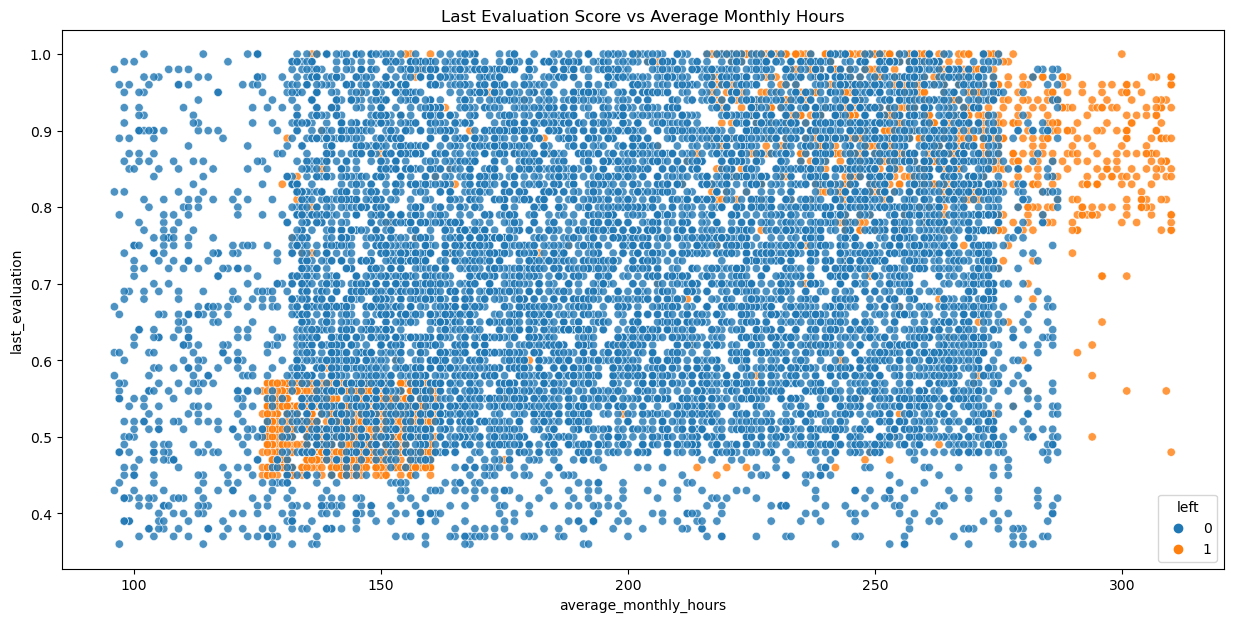

In [24]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='average_monthly_hours',y='last_evaluation',hue='left',data=df1,alpha=0.8)
plt.title('Last Evaluation Score vs Average Monthly Hours')
plt.show()

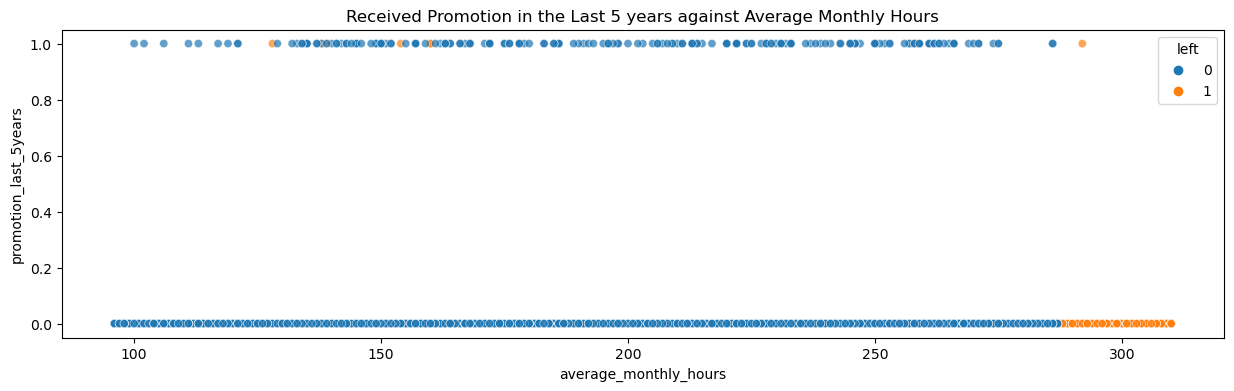

In [25]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='average_monthly_hours',y='promotion_last_5years',hue='left',data=df1,alpha=0.7)
plt.title('Received Promotion in the Last 5 years against Average Monthly Hours')
plt.show()

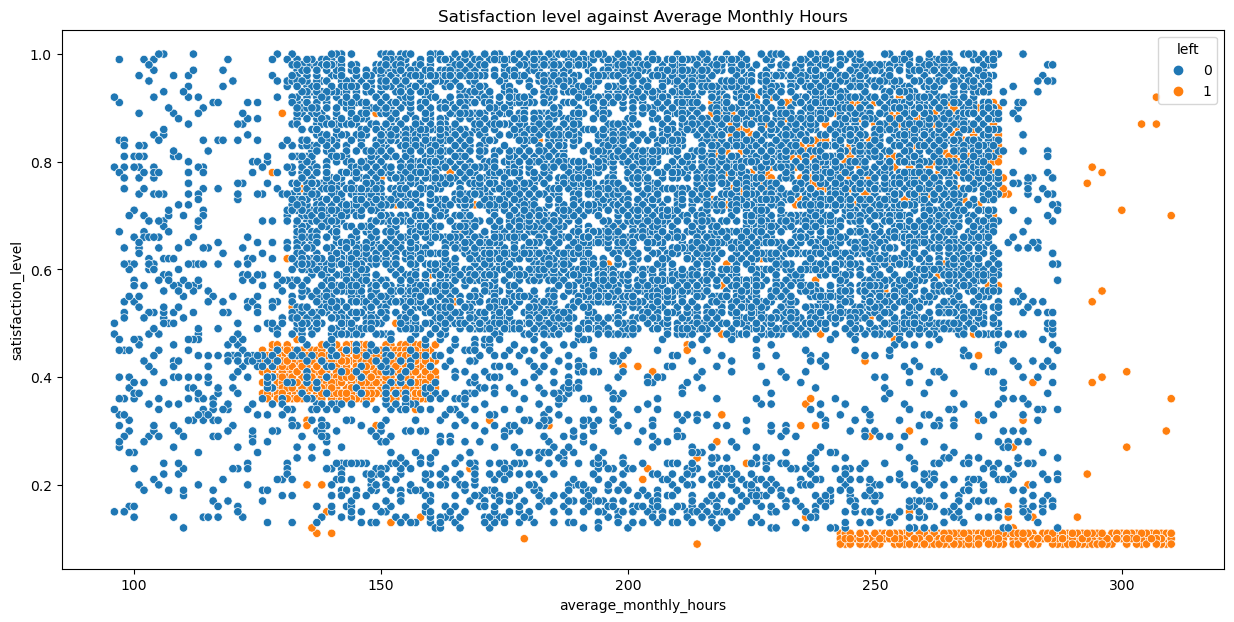

In [26]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='average_monthly_hours',y='satisfaction_level',hue='left',data=df1)
plt.title('Satisfaction level against Average Monthly Hours')
plt.show()

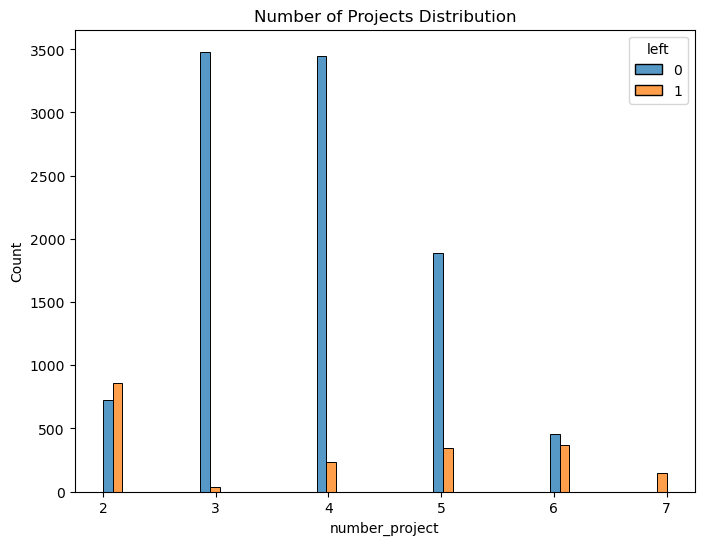

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(x='number_project',data=df1,hue='left',multiple='dodge')
plt.title('Number of Projects Distribution')
plt.show()

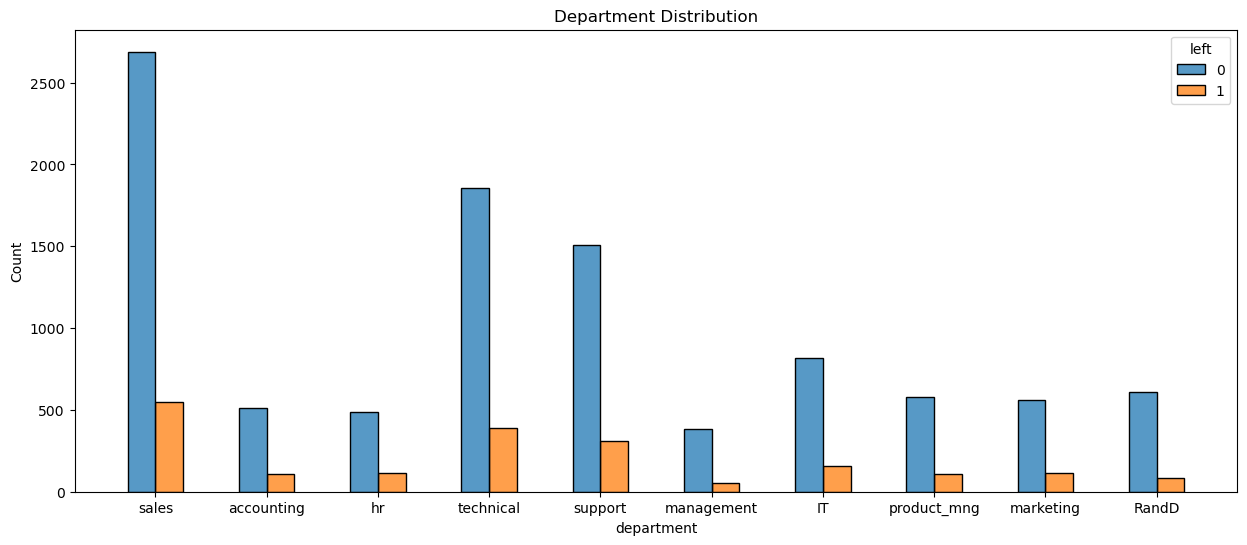

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(x='department',data=df1,hue='left',multiple='dodge',shrink=0.5)
plt.title('Department Distribution')
plt.show()

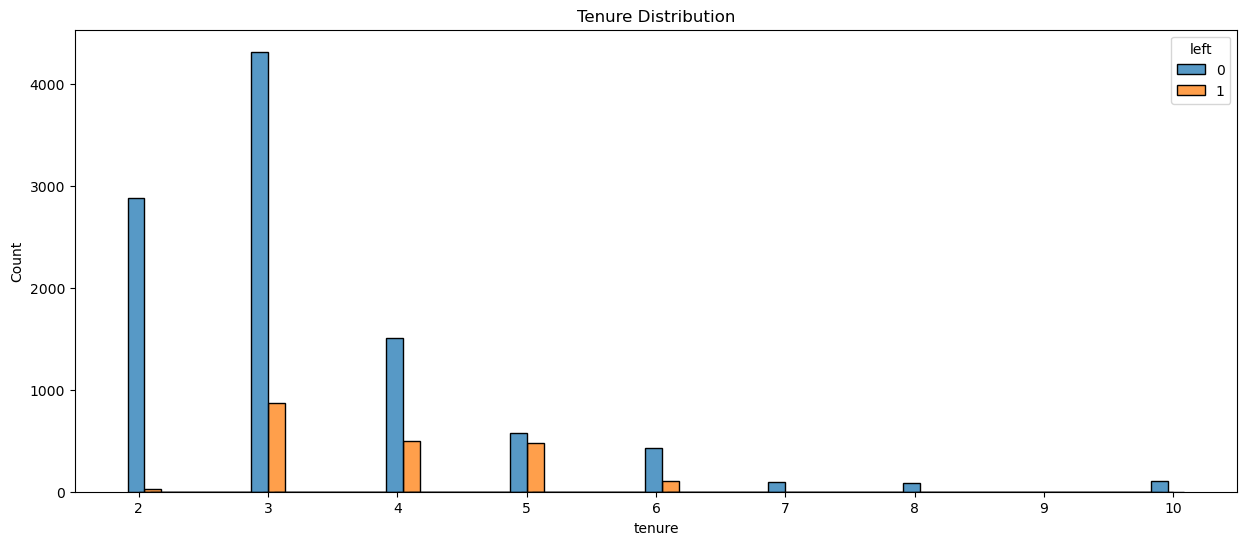

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(x='tenure',data=df1,hue='left',multiple='dodge',shrink=3)
plt.title('Tenure Distribution')
plt.show()

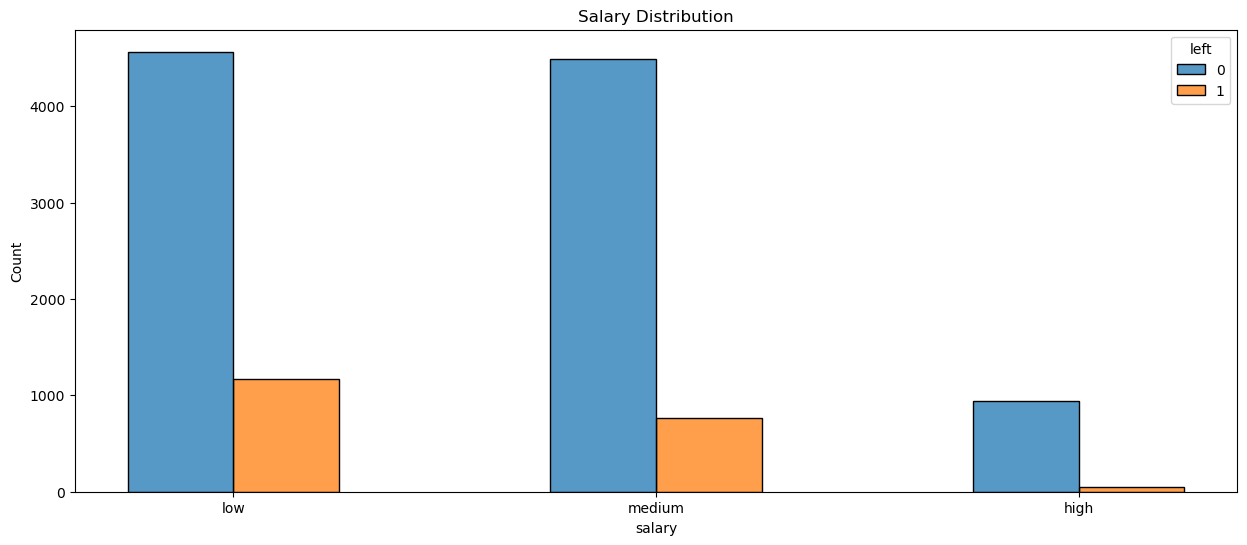

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(x='salary',data=df1,hue='left',multiple='dodge',shrink=0.5)
plt.title('Salary Distribution')
plt.show()

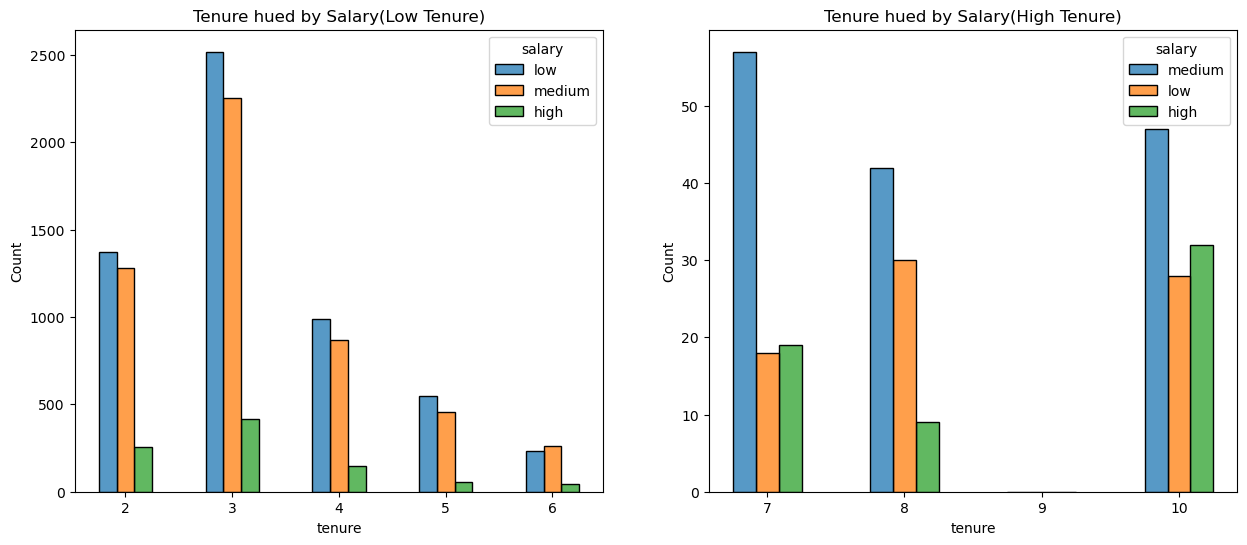

In [31]:
# Salary by tenure

short_tenure = df1[df1['tenure'] < 7]
long_tenure = df1[df1['tenure'] >= 7]

fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='tenure',hue='salary',data=short_tenure,multiple='dodge',discrete=1,shrink=0.5,ax=ax[0])
ax[0].set_title('Tenure hued by Salary(Low Tenure)')
sns.histplot(x='tenure',hue='salary',data=long_tenure,multiple='dodge',discrete=1,shrink=0.5,ax=ax[1])
ax[1].set_title('Tenure hued by Salary(High Tenure)')
ax[1].set_xticks([7,8,9,10])
plt.show()

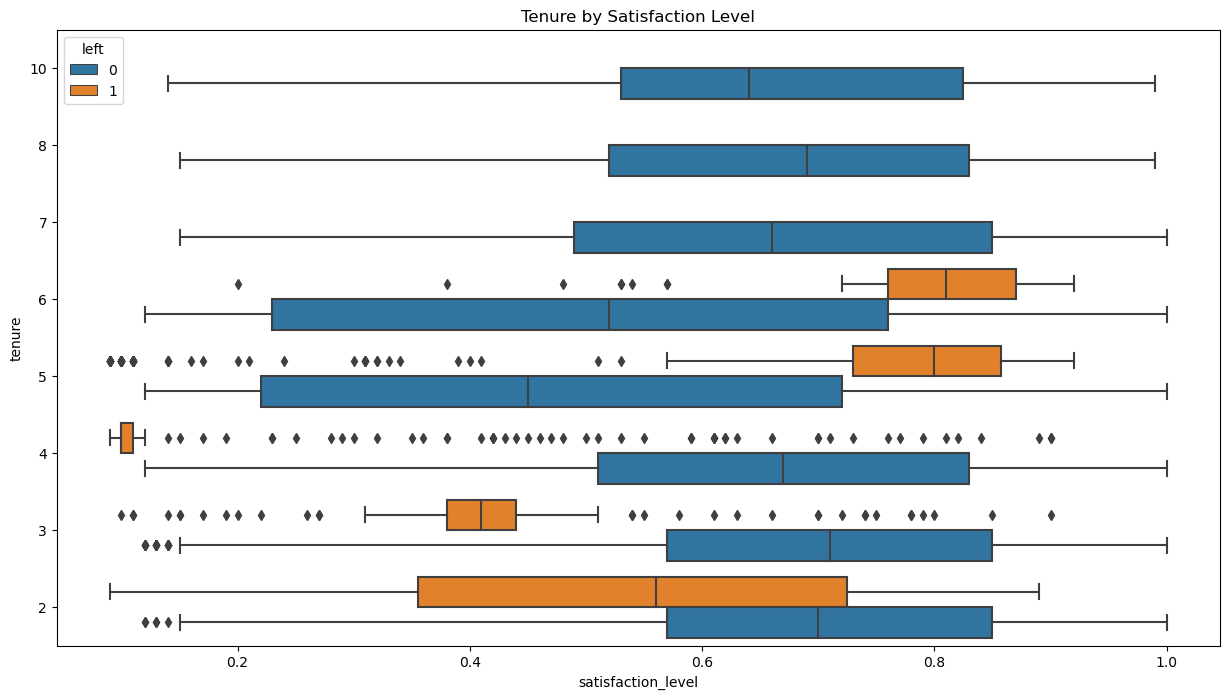

In [32]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='satisfaction_level',y='tenure',data=df1,orient='h',hue='left')
ax.invert_yaxis()
plt.title('Tenure by Satisfaction Level')
plt.show()

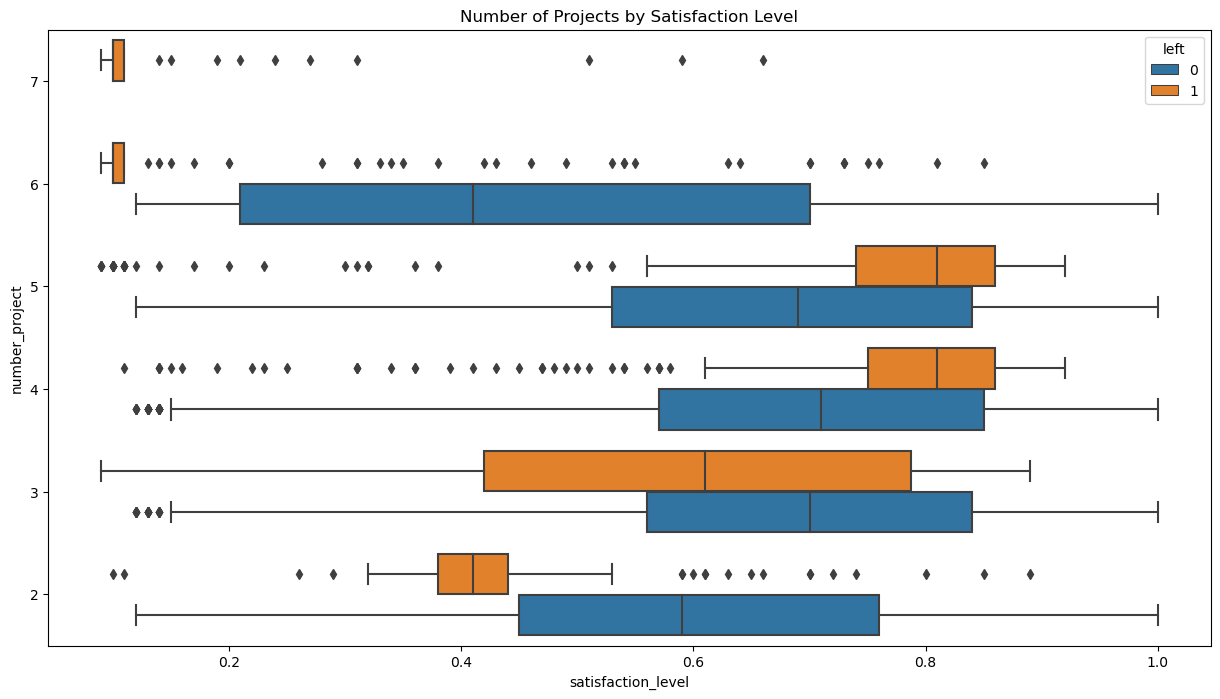

In [33]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='satisfaction_level',y='number_project',data=df1,orient='h',hue='left')
ax.invert_yaxis()
plt.title('Number of Projects by Satisfaction Level')
plt.show()

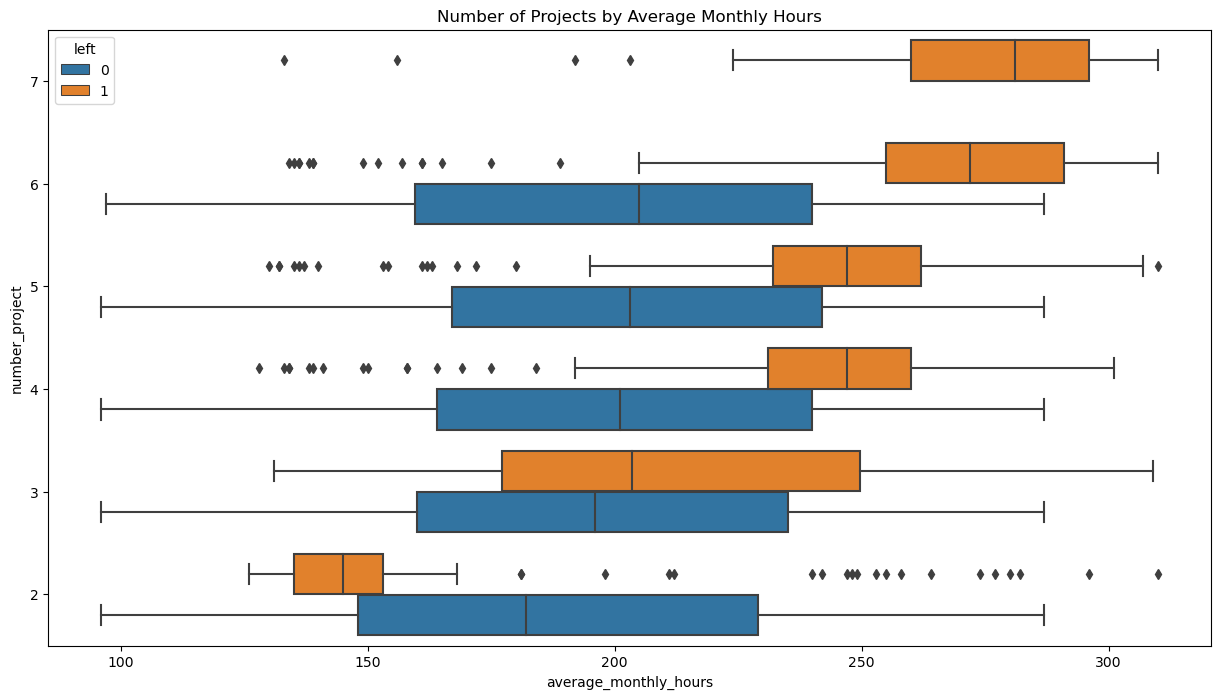

In [34]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='average_monthly_hours',y='number_project',data=df1,orient='h',hue='left')
ax.invert_yaxis()
plt.title('Number of Projects by Average Monthly Hours')
plt.show()

# Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

In [42]:
df1.to_csv("prepared_df.csv",index=False)

In [43]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

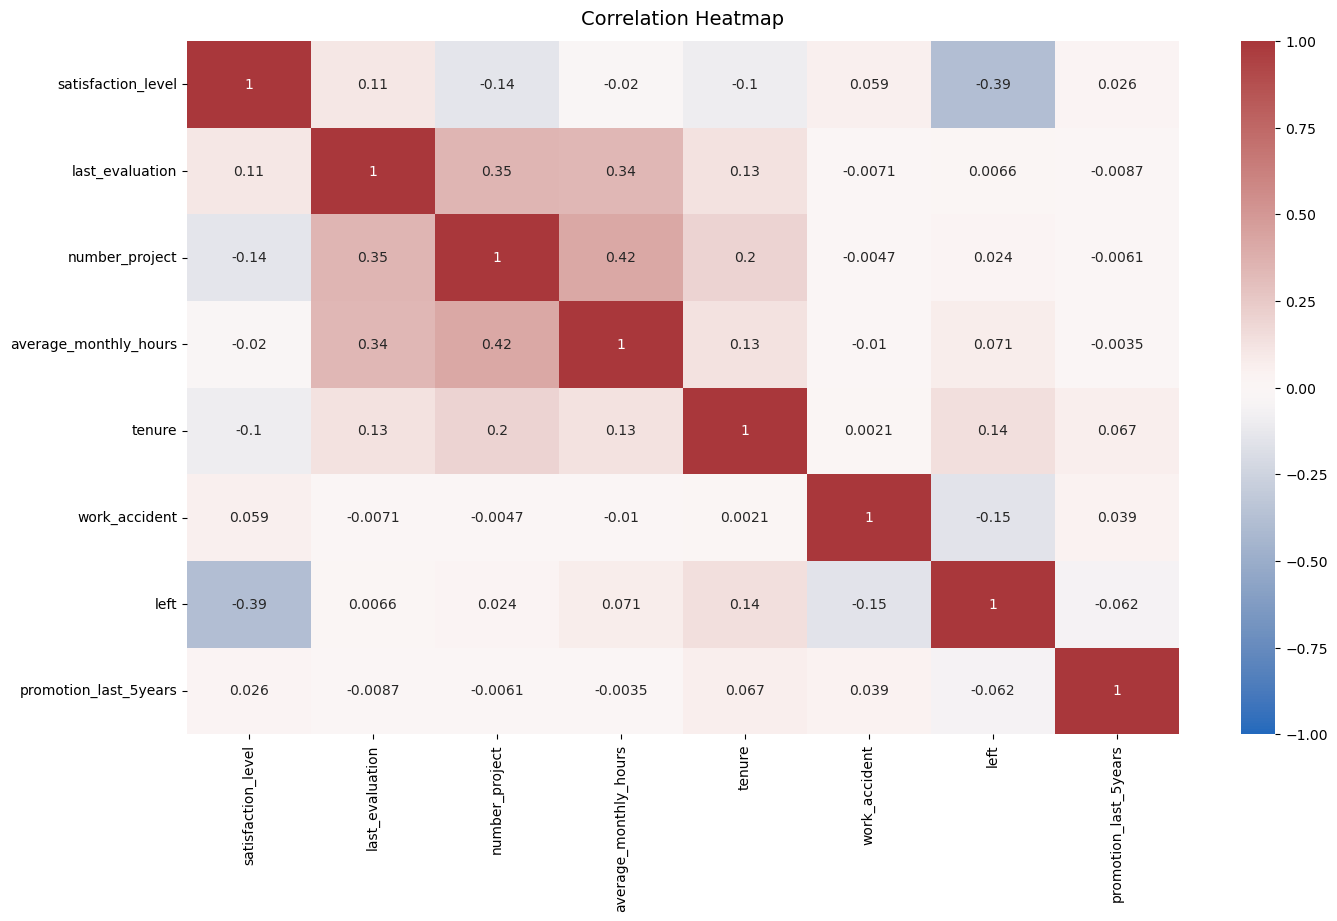

In [11]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);